In [4]:
from scipy.io import loadmat
import numpy as np

# Path to your summary file (adjust if needed)
mat_data = loadmat('/Users/indigobrownhall/Code/MOCAT-VnV/results/radius_0.1_0.1_0.1_0.1_0.1_0.3_0.5_0.6_0.8/summary_baseline_2025.mat')

# Inspect all keys
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'MCconfig', 'param', 'fi5s', 'paramSSEM', 'S_MC', 'D_MC', 'B_MC', 'N_MC', 'param_mean', 'param_median', 'param_var', 'param_prc', '__function_workspace__'])


In [5]:
S_MC = mat_data['S_MC']         # [t, species, realization]
D_MC = mat_data['D_MC']
N_MC = mat_data['N_MC']         # [t, shell, species, realization]
param_mean = mat_data['param_mean']  # [shell_species?, param_type, t, realization]

In [13]:
from scipy.io import loadmat
import numpy as np
import os
import glob
import pandas as pd
import h5py

# --- Config ---
result_folder = "/Users/indigobrownhall/Code/MOCAT-VnV/results"
file_pattern = os.path.join(result_folder, "TLE_*_part_*.mat")

# --- Find all relevant .mat files ---
files = sorted(glob.glob(file_pattern))
print(f"Found {len(files)} .mat files")

# --- Function to load matsatsperN from HDF5 (v7.3 .mat files) ---
def load_matsatsperN_hdf(filepath):
    with h5py.File(filepath, 'r') as f:
        matsats_ref = f['#refs#']
        matsats_root = f['matsatsperN']

        matsats = []
        for i in range(matsats_root.shape[1]):
            obj_ref = matsats_root[0][i]
            if obj_ref == 0:
                matsats.append(None)
                continue
            mat = np.array(matsats_ref[obj_ref])
            matsats.append(mat.T)  # MATLAB is column-major
    return matsats

# --- Load and combine all timesteps ---
all_timesteps = []

for f in files:
    ts = load_matsatsperN_hdf(f)
    print(f"Loaded {len(ts)} timesteps from {os.path.basename(f)}")
    all_timesteps.extend(ts)

# --- Example: Convert one timestep to DataFrame ---
t = 0  # Select a timestep
snapshot = all_timesteps[t]

df = pd.DataFrame(snapshot, columns=[
    'sma', 'ecc', 'mass', 'radius', 'bstar', 'ID', 'class_flag'
])

# Decode object_class and controlled flag
df['object_class'] = df['class_flag'] // 1000
df['controlled'] = df['class_flag'] % 10

print(f"\nSample of timestep {t}:\n", df.head())

Found 4 .mat files
Loaded 1 timesteps from TLE_20250422T095949_0_part_0.mat
Loaded 1 timesteps from TLE_20250422T095949_0_part_1.mat
Loaded 1 timesteps from TLE_20250422T100017_1_part_0.mat
Loaded 1 timesteps from TLE_20250422T100017_1_part_1.mat

Sample of timestep 0:
         sma       ecc       mass    radius     bstar   ID  class_flag  \
0  1.350934  0.184192   1.470000  0.146674  0.002527  1.0         NaN   
1  1.271673  0.145577   9.800000  0.451411  0.003591  2.0         NaN   
2  1.302476  0.165486  31.000000  0.942376  0.004947  3.0         NaN   
3  1.381781  0.202503  31.000000  0.942376  0.004947  4.0         NaN   
4  1.293136  0.165000  22.700001  0.451411  0.001550  5.0         NaN   

   object_class  controlled  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  


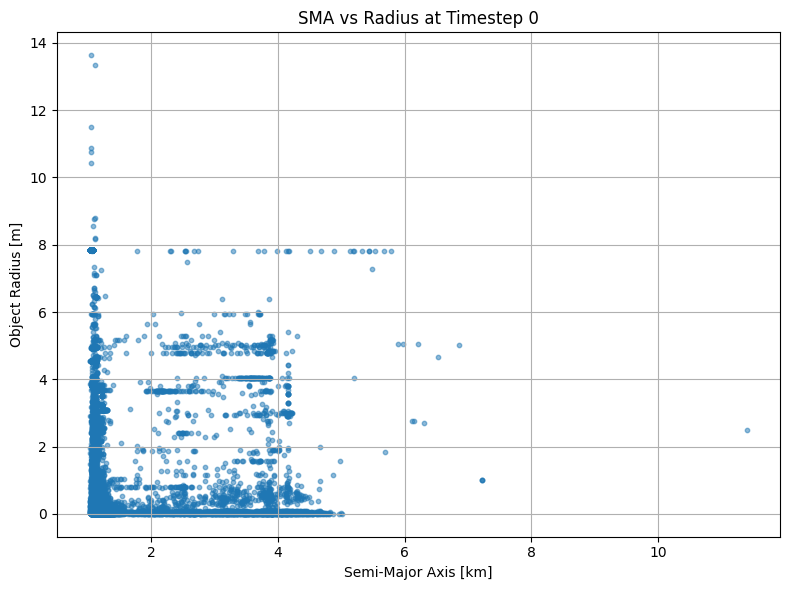

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['sma'], df['radius'], alpha=0.5, s=10)
plt.xlabel('Semi-Major Axis [km]')
plt.ylabel('Object Radius [m]')
plt.title(f'SMA vs Radius at Timestep {t}')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['obj']

,sma,ecc,mass,radius,bstar,ID,class_flag,object_class,controlled
0,1.350934,0.184192,1.470000,0.146674,0.002527,1.0,NaN,NaN,NaN
1,1.271673,0.145577,9.800000,0.451411,0.003591,2.0,NaN,NaN,NaN
2,1.302476,0.165486,31.000000,0.942376,0.004947,3.0,NaN,NaN,NaN
3,1.381781,0.202503,31.000000,0.942376,0.004947,4.0,NaN,NaN,NaN
4,1.293136,0.165000,22.700001,0.451411,0.001550,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
67022,1.086888,0.034578,0.000200,0.013533,0.158143,210206.0,NaN,NaN,NaN
67023,1.126199,0.039759,0.000200,0.013431,0.155768,210207.0,NaN,NaN,NaN
67024,1.141423,0.021345,0.000200,0.013414,0.155374,210208.0,NaN,NaN,NaN
67025,1.125048,0.013730,0.000200,0.005697,0.028026,210209.0,NaN,NaN,NaN
